In [1]:
import tensorflow as tf
from six import BytesIO
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
import numpy as np


from official.vision.utils.object_detection import visualization_utils
from official.vision.dataloaders.tf_example_decoder import TfExampleDecoder
%matplotlib inline

In [3]:
export_dir = 'models/BestImagesV2_exported_model/'
imported = tf.saved_model.load(export_dir)
model_fn = imported.signatures['serving_default']

In [2]:
%load_ext tensorboard
%tensorboard --logdir 'models/trained_model/'

In [4]:
category_index={
    1: {
        'id': 1,
        'name': 'Mature-Myotube'
       }
}
tf_ex_decoder = TfExampleDecoder()

In [5]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: the file path to the image

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  image = None
  if(path.startswith('http')):
    response = urlopen(path)
    image_data = response.read()
    image_data = BytesIO(image_data)
    image = Image.open(image_data)
  else:
    image_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(image_data))

  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (1, im_height, im_width, 3)).astype(np.uint8)

In [6]:
from typing import List
class Myotube:
    def __init__(self,coords:List[float],score):
        self.coords = coords
        self.score = score
    def getConfidencePercentage(self):
        return self.score*100
    def getHeight(self):
        #De arriba(y1) hacia abajo(y2)
        y1=self.coords[0]
        y2=self.coords[1]
        return abs(y1-y2)
    def getWidth(self):
        #De derecha(x1) a izquierda(x2)
        x1=self.coords[2]
        x2=self.coords[3]
        return abs(x1-x2)
    def getArea(self):
        return self.getHeight() * self.getWidth()
    
    

In [7]:
def myotube_inferences(selected_boxes,selected_scores):
    myotube_list=[]
    for i in range (len(selected_boxes)):
        myotube_list.append(Myotube(selected_boxes[i],selected_scores[i]))
    
    print("num of myotubes:",len(myotube_list))
    for i in (myotube_list):
        print("Myotube:")
        print("Score: ",i.getConfidencePercentage(),"%")
        print("Width: ",i.getWidth())
        print("Height: ",i.getHeight())
        print("Area: ",i.getArea())
        print("\n\n")

num of myotubes: 19
Myotube:
Score:  89.39788341522217 %
Width:  312.82803
Height:  358.85852
Area:  112261.01



Myotube:
Score:  79.64633107185364 %
Width:  137.03589
Height:  89.97043
Area:  12329.178



Myotube:
Score:  79.29590940475464 %
Width:  130.48987
Height:  136.04657
Area:  17752.7



Myotube:
Score:  51.82260274887085 %
Width:  167.39377
Height:  160.0222
Area:  26786.719



Myotube:
Score:  47.95295000076294 %
Width:  269.8457
Height:  273.7798
Area:  73878.3



Myotube:
Score:  41.13113284111023 %
Width:  85.43829
Height:  80.72397
Area:  6896.918



Myotube:
Score:  36.78862750530243 %
Width:  118.73285
Height:  107.12668
Area:  12719.456



Myotube:
Score:  26.486721634864807 %
Width:  38.770355
Height:  90.74588
Area:  3518.25



Myotube:
Score:  22.607028484344482 %
Width:  58.151337
Height:  79.846954
Area:  4643.207



Myotube:
Score:  17.004548013210297 %
Width:  412.9247
Height:  411.29132
Area:  169832.34



Myotube:
Score:  15.25634378194809 %
Width:  449.5209

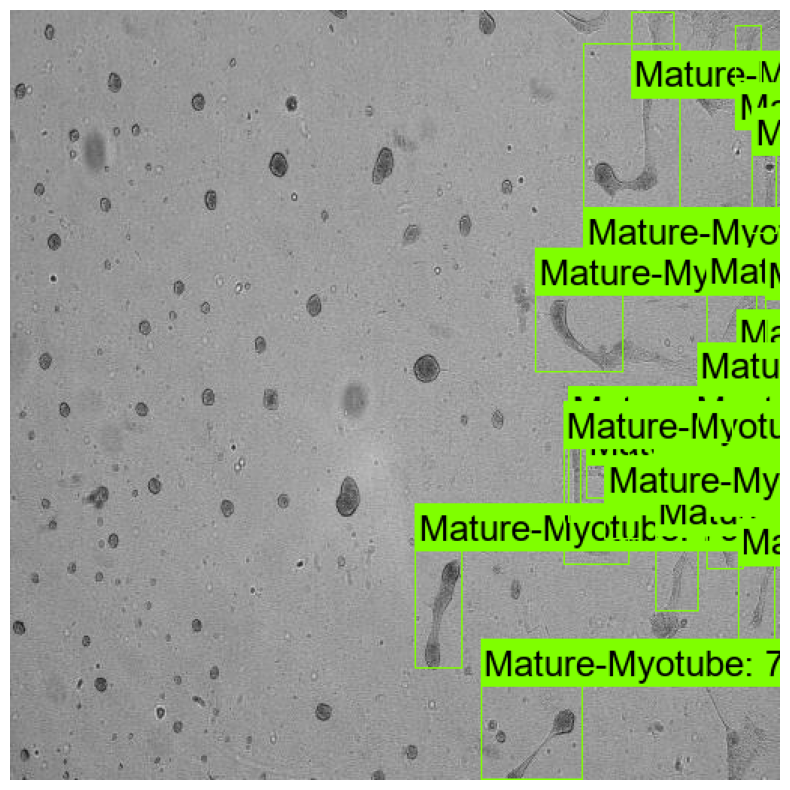

num of myotubes: 34
Myotube:
Score:  87.5825047492981 %
Width:  104.56489
Height:  80.56768
Area:  8424.551



Myotube:
Score:  71.98681235313416 %
Width:  42.426987
Height:  60.470634
Area:  2565.587



Myotube:
Score:  70.44280171394348 %
Width:  388.16583
Height:  423.45377
Area:  164370.28



Myotube:
Score:  63.051044940948486 %
Width:  285.83755
Height:  291.46985
Area:  83313.03



Myotube:
Score:  54.626935720443726 %
Width:  57.87297
Height:  81.48683
Area:  4715.8853



Myotube:
Score:  50.264132022857666 %
Width:  275.29144
Height:  282.24323
Area:  77699.15



Myotube:
Score:  48.36402237415314 %
Width:  33.868866
Height:  13.123291
Area:  444.47098



Myotube:
Score:  34.8891943693161 %
Width:  300.79407
Height:  313.04535
Area:  94162.19



Myotube:
Score:  30.879753828048706 %
Width:  173.58768
Height:  203.1029
Area:  35256.16



Myotube:
Score:  27.67713963985443 %
Width:  299.6386
Height:  300.1361
Area:  89932.37



Myotube:
Score:  25.542399287223816 %
Width:  290.6

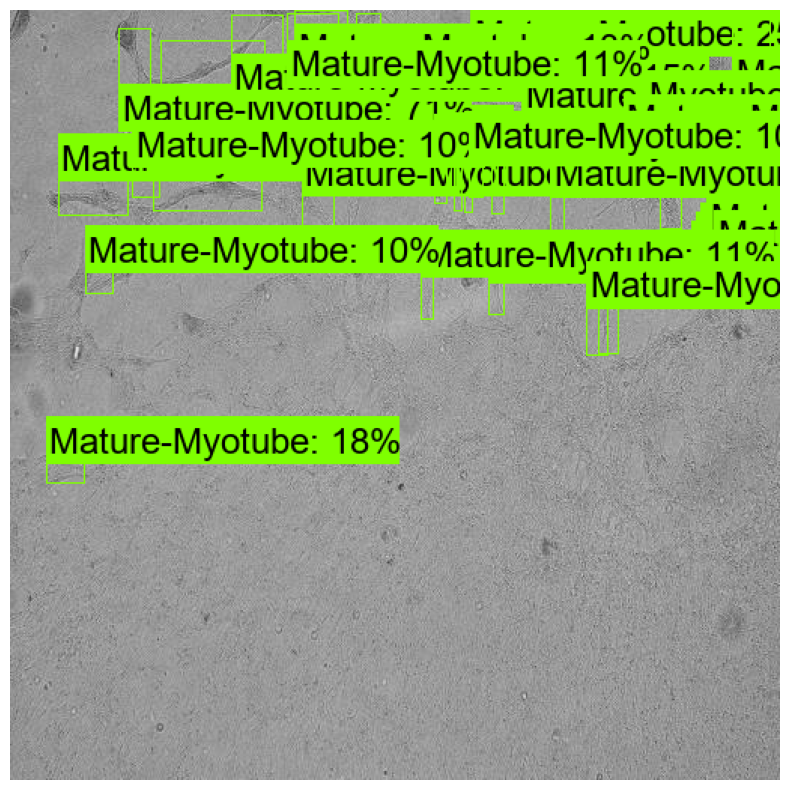

num of myotubes: 34
Myotube:
Score:  82.67683982849121 %
Width:  138.02185
Height:  127.69261
Area:  17624.371



Myotube:
Score:  80.04259467124939 %
Width:  265.9086
Height:  267.51697
Area:  71135.06



Myotube:
Score:  61.258888244628906 %
Width:  52.165955
Height:  78.982376
Area:  4120.191



Myotube:
Score:  61.21569871902466 %
Width:  342.806
Height:  337.98578
Area:  115863.555



Myotube:
Score:  56.96394443511963 %
Width:  291.18414
Height:  295.25037
Area:  85972.23



Myotube:
Score:  55.89320659637451 %
Width:  388.84888
Height:  404.14246
Area:  157150.34



Myotube:
Score:  51.923197507858276 %
Width:  26.995285
Height:  33.005028
Area:  890.9801



Myotube:
Score:  45.58316469192505 %
Width:  280.8103
Height:  280.2858
Area:  78707.14



Myotube:
Score:  44.001999497413635 %
Width:  162.07085
Height:  218.59416
Area:  35427.742



Myotube:
Score:  38.776206970214844 %
Width:  299.70544
Height:  260.73645
Area:  78144.13



Myotube:
Score:  34.843358397483826 %
Width:  

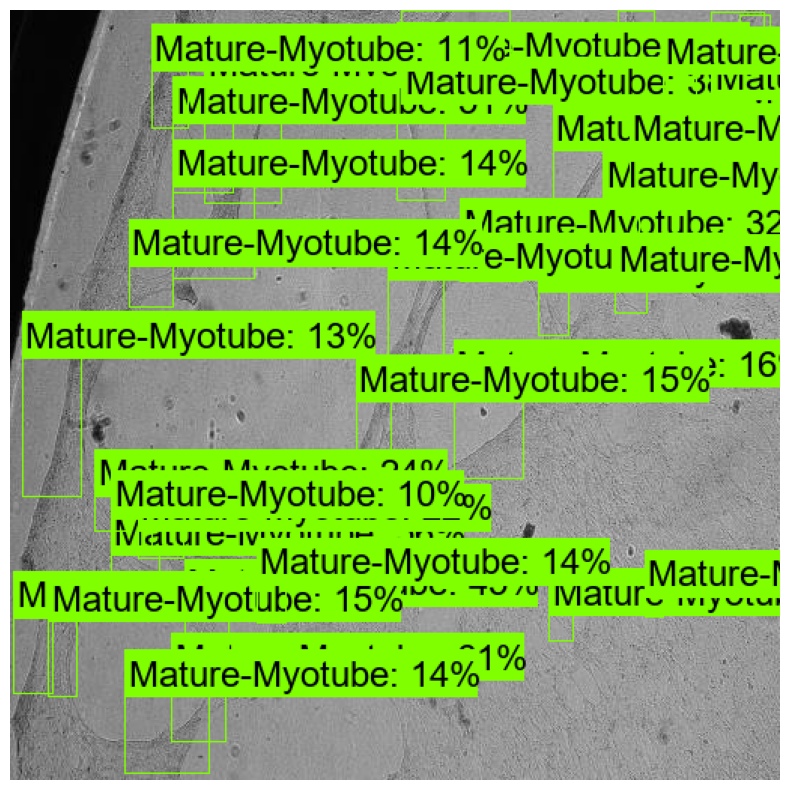

num of myotubes: 50
Myotube:
Score:  96.41287326812744 %
Width:  2.7131958
Height:  6.519745
Area:  17.689344



Myotube:
Score:  76.62405967712402 %
Width:  411.59167
Height:  414.58163
Area:  170638.34



Myotube:
Score:  74.33650493621826 %
Width:  36.621967
Height:  31.59665
Area:  1157.1315



Myotube:
Score:  71.10676765441895 %
Width:  239.66724
Height:  254.19955
Area:  60923.305



Myotube:
Score:  71.011483669281 %
Width:  443.36197
Height:  444.00012
Area:  196852.77



Myotube:
Score:  68.88298988342285 %
Width:  155.35953
Height:  160.08963
Area:  24871.45



Myotube:
Score:  65.68536162376404 %
Width:  239.9715
Height:  246.57071
Area:  59169.94



Myotube:
Score:  54.96432185173035 %
Width:  96.87367
Height:  77.22438
Area:  7481.0093



Myotube:
Score:  42.737603187561035 %
Width:  26.930115
Height:  26.832428
Area:  722.60034



Myotube:
Score:  42.539629340171814 %
Width:  310.74832
Height:  308.32867
Area:  95812.62



Myotube:
Score:  40.75160622596741 %
Width:  124

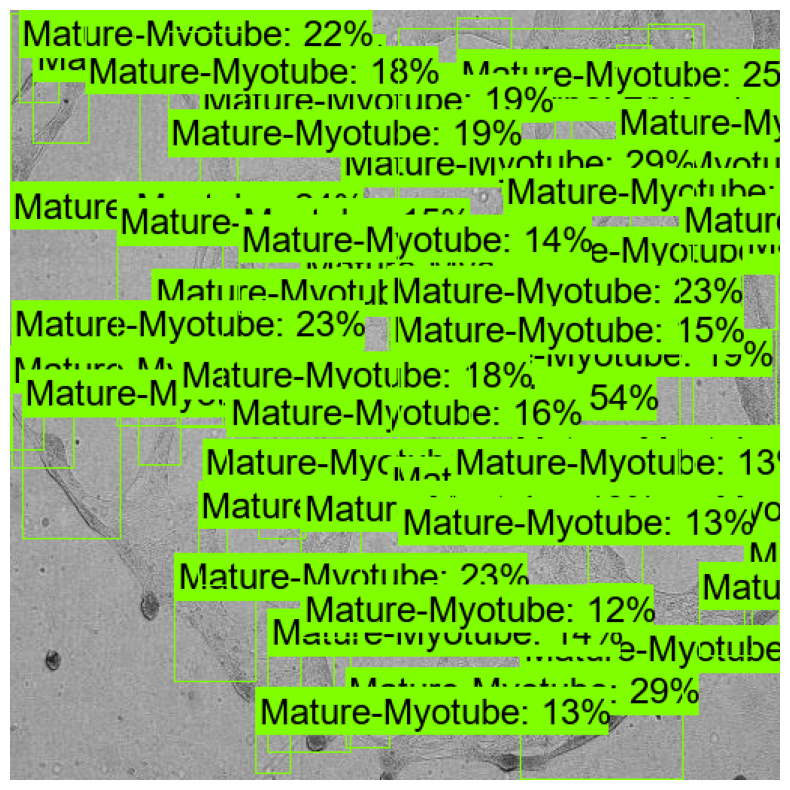

num of myotubes: 5
Myotube:
Score:  48.6508309841156 %
Width:  45.987915
Height:  47.960197
Area:  2205.5896



Myotube:
Score:  23.384128510951996 %
Width:  36.15605
Height:  42.988575
Area:  1554.2971



Myotube:
Score:  21.69017493724823 %
Width:  69.68416
Height:  32.389114
Area:  2257.008



Myotube:
Score:  18.17108690738678 %
Width:  13.89817
Height:  17.546663
Area:  243.86652



Myotube:
Score:  10.682962834835052 %
Width:  68.871185
Height:  68.53998
Area:  4720.4297





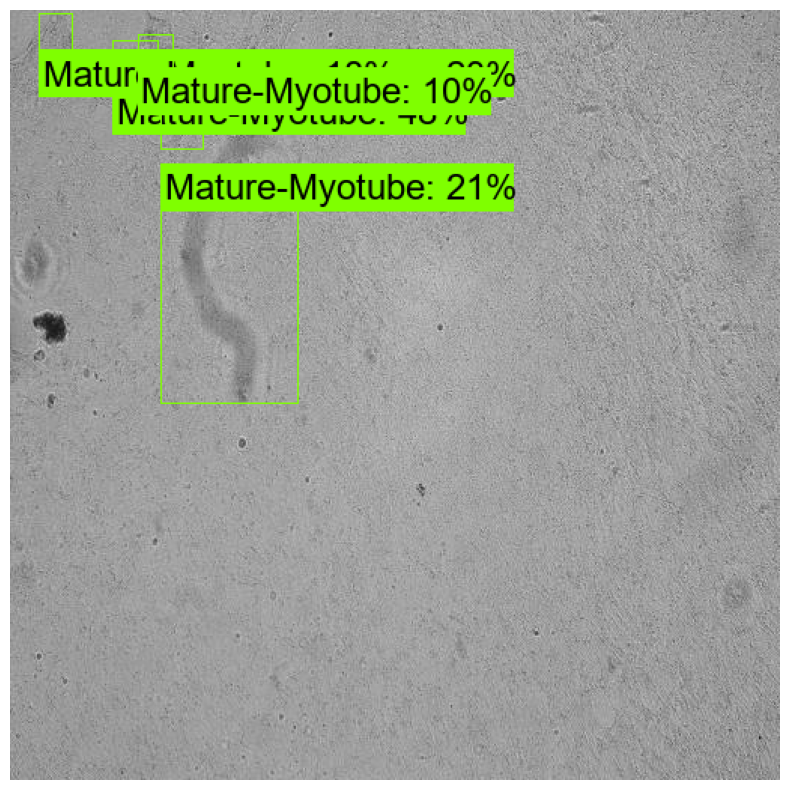

num of myotubes: 22
Myotube:
Score:  59.26053524017334 %
Width:  245.66876
Height:  277.21713
Area:  68103.586



Myotube:
Score:  43.32360029220581 %
Width:  402.28632
Height:  433.57788
Area:  174422.45



Myotube:
Score:  24.862481653690338 %
Width:  184.33493
Height:  170.09406
Area:  31354.275



Myotube:
Score:  22.829145193099976 %
Width:  2.348877
Height:  24.033356
Area:  56.451397



Myotube:
Score:  22.12257832288742 %
Width:  217.0441
Height:  231.41827
Area:  50227.97



Myotube:
Score:  19.912801682949066 %
Width:  332.14407
Height:  354.00754
Area:  117581.51



Myotube:
Score:  16.91208779811859 %
Width:  13.651733
Height:  19.32132
Area:  263.7695



Myotube:
Score:  15.973162651062012 %
Width:  364.40726
Height:  370.54657
Area:  135029.86



Myotube:
Score:  15.012624859809875 %
Width:  59.84915
Height:  72.27965
Area:  4325.8755



Myotube:
Score:  14.490967988967896 %
Width:  44.36711
Height:  15.991623
Area:  709.50214



Myotube:
Score:  14.093051850795746 %
Widt

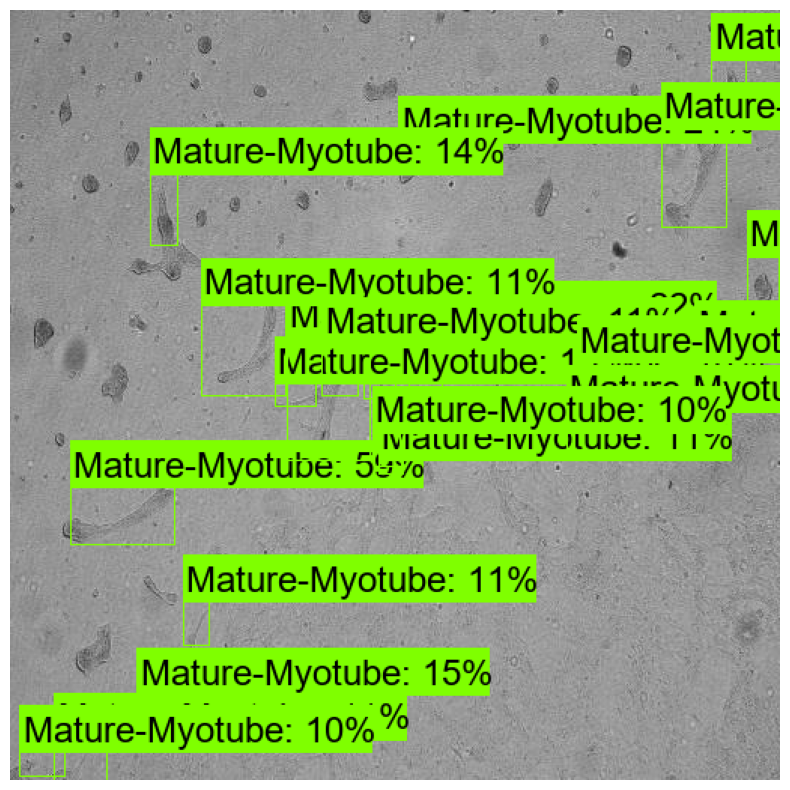

In [19]:
HEIGHT, WIDTH = 512, 512  # Fixed image size expected by the model
input_image_size = (HEIGHT, WIDTH)
image_paths = [
    "1c0d96ad-Gannon_2024-08-15_06-22-52_B3_02_03__Best_png.rf.f7c10daf9ac712b9bb3f99c8d1fc3096.jpg",
    "1e2025d8-Gannon_2024-08-15_09-23-27_A3_03_06__Best_png.rf.521b7105a23fcedc76b80ca414e438e9.jpg",
    "57a111eb-Gannon_2024-08-15_21-23-02_B2_01_05__Best_png.rf.1839764713f45462c713e9435cbed8d2.jpg",
    "781aab45-Gannon_2024-08-16_00-23-06_A1_03_03__Best_png.rf.2aeba1b5c4ce4cd3aac06b214a7fa14c.jpg",
    "88578a89-Gannon_2024-08-15_21-23-02_B2_02_05__Best_png.rf.69edb432ed3358d4c202bd6c926fa366.jpg",
    "c60e5cf3-Gannon_2024-08-15_00-23-27_A2_02_06__Best_png.rf.820d7ad580e9c53fc0414ae715a54472.jpg"
]

min_score_thresh = 0.10  # Set score threshold to display bounding boxes
iou_threshold = 0.30      # IoU threshold for Non-Max Suppression
max_boxes = 50 # Maximum number of boxes after NMS

for i, image_path in enumerate(image_paths):
    # Correct the image path if needed
    
    image_name=image_path[0:image_path.find('.')]
    
    image_path = r"COCO_annotations/BestImagesV2.coco/test/" + image_path
    

    # 1. Load the image into a NumPy array
    image_np = load_image_into_numpy_array(image_path)

    # 2. Resize the image to match the input size expected by the model
    input_tensor = tf.image.resize(image_np, input_image_size)

    # Convert to uint8 (the expected type for the model)
    input_tensor = tf.cast(input_tensor, dtype=tf.uint8)

    # Check the shape of the input tensor
    #print(f"Processing image: {image_name} {i+1}/{len(image_paths)} - Input tensor shape: {input_tensor.shape}")

    # 3. Perform inference with the model
    detections = model_fn(input_tensor)

    # 4. Extract detection results
    detection_boxes = detections['detection_boxes'][0].numpy()
    detection_classes = detections['detection_classes'][0].numpy().astype(int)
    detection_scores = detections['detection_scores'][0].numpy()
    #----------------------------------------------------------
    selected_indices = tf.image.non_max_suppression(
        boxes=detection_boxes,
        scores=detection_scores,
        max_output_size=max_boxes,
        iou_threshold=iou_threshold,
        score_threshold=min_score_thresh
    )
    selected_boxes = tf.gather(detection_boxes, selected_indices).numpy()
    selected_classes = tf.gather(detection_classes, selected_indices).numpy()
    selected_scores = tf.gather(detection_scores, selected_indices).numpy()
    
    # print("selected_boxes: ",selected_boxes,"\n\n\n")
    # print("selected_classes: ",selected_classes,"\n\n\n")
    # print("selected_scores: ",selected_scores,"\n\n\n")
    myotube_inferences(selected_boxes,selected_scores)
    #----------------------------------------------------------
    
    # 5. Visualize the results on the image
    image = Image.open(image_path)
    image_np = np.array(image)
    

    
    visualization_utils.visualize_boxes_and_labels_on_image_array(
        image_np,
        selected_boxes,
        selected_classes,
        selected_scores,
        category_index=category_index,
        use_normalized_coordinates=False,
        max_boxes_to_draw=max_boxes,
        min_score_thresh=min_score_thresh,
        agnostic_mode=False,
        instance_masks=None,
        skip_scores=False,
        line_thickness=1
    )

    # 6. Plot each image individually
    plt.figure(figsize=(10, 10))
    plt.imshow(image_np)
    plt.axis('off')
    plt.show()

# Optionally, close the plot window after the loop ends
plt.close()